Saved: 'test.png'
Time: 00:00.15 (Saving: 00:00.02)



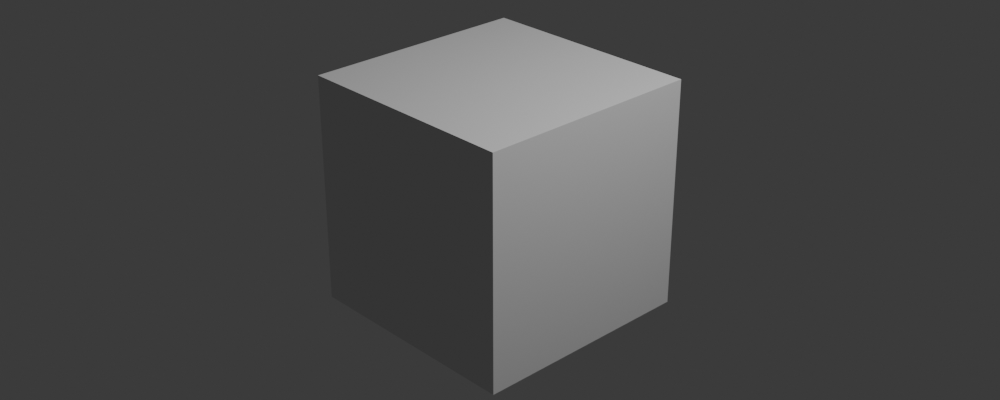

In [13]:
import bpy
from IPython.display import Image, display

# Render
path = "test.png"
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 400
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image(path))

In [14]:
import sys
import os
sys.path.append('/Library/Application Support/Blackmagic Design/DaVinci Resolve/Developer/Scripting/Modules')
import DaVinciResolveScript as dvr_script

# Initialize DaVinci Resolve
resolve = dvr_script.scriptapp("Resolve")

# Get the project manager and current project
projectManager = resolve.GetProjectManager()
currentProject = projectManager.GetCurrentProject()
media_pool = currentProject.GetMediaPool()

# Get the current timeline or create a new one if none exists
currentTimeline = currentProject.GetCurrentTimeline()
if currentTimeline is None:
    currentTimeline = media_pool.CreateEmptyTimeline("MyTimeline")

print(f"Current project: {currentProject.GetName()}")

# Insert a simple title into the timeline
simple_title = currentTimeline.InsertTitleIntoTimeline('Text')

# Paths to the latest .mov and .png files on the Desktop
latest_mov_file = os.path.expanduser("~/Desktop/fin.mov")
latest_png_file = os.path.expanduser("~/Desktop/test.png")

def import_and_append_media(file_path):
    if os.path.exists(file_path):
        # Import the media file into the project
        mediaPool = currentProject.GetMediaPool()
        mediaPool.ImportMedia([file_path])
        
        # Get the imported clip
        mediaItems = mediaPool.GetRootFolder().GetClipList()
        importedClip = None
        for clip in mediaItems:
            if clip.GetClipProperty("File Path") == file_path:
                importedClip = clip
                break

        if importedClip:
            # Append the imported clip to the timeline
            mediaPool.AppendToTimeline([importedClip])
            print(f"The imported clip ({file_path}) has been added to the timeline.")
        else:
            print(f"The imported clip ({file_path}) was not found in the media pool.")
    else:
        print(f"The specified file ({file_path}) does not exist.")

# Import and append the .mov file
import_and_append_media(latest_mov_file)

# Import and append the .png file
import_and_append_media(latest_png_file)

Current project: Untitled Project 2024-05-18_130202
The imported clip (/Users/jan-hendrik/Desktop/fin.mov) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/test.png) has been added to the timeline.
